<a href="https://colab.research.google.com/github/iamhannahkoh/DeepLearning/blob/main/Multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multiclass Classification

**About the Data**

We will use images of hands playing rock, paper, scissor game. This dataset was prepared by Laurence Moroney as a part of his Deep Learning course "Convolutional Neural Networks in TensorFlow". You can find more information on this dataset here: https://www.tensorflow.org/datasets/catalog/rock_paper_scissors.

### 1. Set up data

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2021-01-07 09:43:08--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.128, 142.250.101.128, 2607:f8b0:4023:c06::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   115MB/s    in 1.7s    

2021-01-07 09:43:11 (115 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2021-01-07 09:43:11--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.128, 142.250.101.128, 2607:f8b0:4023:c03::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip

In [ ]:
import os 
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [ ]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir =os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

total training rock images: 840
total training paper images: 840
total training scissors images: 840


### 2. Image Generator

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = '/tmp/rps/'
training_datagen = ImageDataGenerator(rescale = 1./255.,
                                      rotation_range =40,
                                      width_shift_range =0.2,
                                      height_shift_range = 0.2,
                                      shear_range =0.2,
                                      zoom_range =0.2,
                                      horizontal_flip = True,
                                      fill_mode = 'nearest')

validation_dir = '/tmp/rps-test-set/'
validation_datagen = ImageDataGenerator(rescale = 1./255.)

train_generator = training_datagen.flow_from_directory(train_dir,
                                                       target_size = (150,150),
                                                       class_mode = 'categorical',
                                                       batch_size =126)


validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              target_size = (150, 150),
                                                              class_mode = 'categorical',
                                                              batch_size = 126)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


### 3. Modeling

In [ ]:
model =  tf.keras.models.Sequential([tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
                                     tf.keras.layers.MaxPooling2D(2,2),
                                     tf.keras.layers.Conv2D(64, (3,3), activation= 'relu'),
                                     tf.keras.layers.MaxPooling2D(2,2),
                                     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                     tf.keras.layers.MaxPooling2D(2,2),
                                     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                     tf.keras.layers.MaxPooling2D(2,2),
                                     tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dropout(0.5),
                                     tf.keras.layers.Dense(512, activation='relu'),
                                     tf.keras.layers.Dense(3, activation='softmax')])

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

Epoch 1/25
20/20 [==============================] - 152s 7s/step - loss: 2.4359 - accuracy: 0.3262 - val_loss: 1.0888 - val_accuracy: 0.3387
Epoch 2/25
20/20 [==============================] - 149s 7s/step - loss: 1.0885 - accuracy: 0.3987 - val_loss: 1.0896 - val_accuracy: 0.3333
Epoch 3/25
20/20 [==============================] - 148s 7s/step - loss: 1.1309 - accuracy: 0.4356 - val_loss: 0.9313 - val_accuracy: 0.6801
Epoch 4/25
20/20 [==============================] - 148s 7s/step - loss: 0.9920 - accuracy: 0.4982 - val_loss: 0.9153 - val_accuracy: 0.6425
Epoch 5/25
20/20 [==============================] - 148s 7s/step - loss: 0.9069 - accuracy: 0.5619 - val_loss: 0.7113 - val_accuracy: 0.7608
Epoch 6/25
20/20 [==============================] - 148s 7s/step - loss: 0.8195 - accuracy: 0.6341 - val_loss: 1.6300 - val_accuracy: 0.3468
Epoch 7/25
20/20 [==============================] - 149s 7s/step - loss: 0.9422 - accuracy: 0.6274 - val_loss: 0.6008 - val_accuracy: 0.6371
Epoch 8/25
20

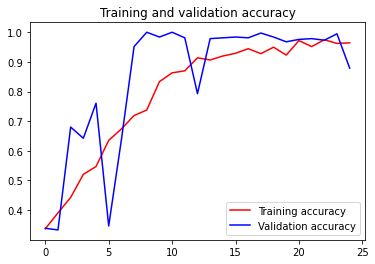

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

Data source: DeepLearning.AI TensorFlow Developer Professional Certificate Specialization on Coursera